In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pandas_datareader.data as pdr
from datetime import datetime

In [40]:
df = pd.read_csv("traders_data.csv")

In [41]:
df

,countryCode,firstName,lastName,traderId,stockSymbol,stockName,tradeId,price,volume,tradeDatetime
0,TV,Vanessa,Green,MUVGtYHdeMdauAxzEJvt,FB,Facebook,NaN,1701.760000,58.0,2020-04-03 07:03:32
1,NaN,NaN,NaN,NaN,FB,Facebook,P5-3756422C,NaN,98.0,2020-01-13 08:29:53
2,UZ,Brandi,Robbins,JTzVqzzIkFlrYUQbhnOR,AMZN,Amazon,X0-7401234c,1857.630560,NaN,2020-07-16 07:18:39
3,BT,Allison,Davis,TzqyQTQjZGeLZuJqlLaQ,AMZN,Amazon,K3-3189326K,2078.440300,32.0,2020-07-07 13:59:03
4,SZ,Blake,Martin,WVcMKILUHtBkEahrPLrG,FB,Facebook,U4-1266883G,1809.600000,212.0,2020-08-01 02:57:54
...,...,...,...,...,...,...,...,...,...,...
995,KZ,Vicki,Burgess,deTclcaRrihIYAUADJPN,AMZN,Amazon,j3-8758429Q,1554.962000,243.0,2020-03-12 19:42:37
996,NaN,NaN,NaN,NaN,AMZN,Amazon,K3-7867680F,2285.000000,4.0,2020-07-21 05:36:12
997,KZ,Vicki,Burgess,deTclcaRrihIYAUADJPN,FB,Facebook,S8-7693720h,1935.760000,223.0,2020-02-05 23:28:16
998,CV,April,Floyd,stOzTFyGrgJGPgVPVTJQ,AMZN,Amazon,z1-1234462u,2039.582452,52.0,2020-06-24 13:28:57


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryCode    795 non-null    object 
 1   firstName      795 non-null    object 
 2   lastName       795 non-null    object 
 3   traderId       795 non-null    object 
 4   stockSymbol    913 non-null    object 
 5   stockName      913 non-null    object 
 6   tradeId        909 non-null    object 
 7   price          898 non-null    float64
 8   volume         895 non-null    float64
 9   tradeDatetime  902 non-null    object 
dtypes: float64(2), object(8)
memory usage: 78.2+ KB


 
1) Dataset contains details of 1000 trading details in 10 features.  
2) Every feature have missing values.   
3) tradeDatetime data type is string that need to convert to datetime.    
4) Memory Usage: 78.2 KB   



## Date Preprocessing

In [43]:

# Updating datatype of 'tradeDatetime' from string to datetime
df['tradeDatetime'] = pd.to_datetime(df['tradeDatetime'])

# Removing the time stamp from the datatime 
df['tradeDate'] = df['tradeDatetime'].apply(lambda x: pd.to_datetime(x.date()))

df['tradeDate'] = pd.to_datetime(df['tradeDate'])
# traders_data['volume'] = traders_data['volume'].astype(int)



In [44]:
# To understand which column is categorical and which one is Continuous
df.nunique()

countryCode       19
firstName         20
lastName          20
traderId          20
stockSymbol        3
stockName          3
tradeId          909
price            879
volume           286
tradeDatetime    902
tradeDate        206
dtype: int64

In [45]:
df.describe()

,price,volume
count,898.000000,895.000000
mean,1992.943372,148.887151
std,288.685224,86.763078
min,1501.000000,0.000000
25%,1751.314618,70.000000
50%,1988.310480,148.000000
75%,2235.975207,221.000000
max,2499.120000,300.000000


## Data Cleaning

Trade dataset contains trading details for Amazon, Facebook, Tesla, however our objective is to find suspicous data for Amazon for Feb and March month. So dataset need to remove the unnecessary data from traders dataset.

In [46]:
# Date range of traders dataset
print('Traders dataset start date : ',df['tradeDate'].min())
print('Traders dataset end date : ',df['tradeDate'].max())

Traders dataset start date :  2020-01-06 00:00:00
Traders dataset end date :  2020-08-01 00:00:00


In [47]:
df.isnull().sum()

countryCode      205
firstName        205
lastName         205
traderId         205
stockSymbol       87
stockName         87
tradeId           91
price            102
volume           105
tradeDatetime     98
tradeDate         98
dtype: int64

In [48]:
df.shape

(1000, 11)

In [49]:

# Define function to filter dataset
def filter_trader_data(df, company, start_date, end_date):
    '''
    Returns the filtered trader data based on company, start date and end date.

    Parameters:
        df (dataframe):The trader data which is to be filter.
        company (string): Company by which trader data need to filter.
        start_date (string) : Start date from where trader data require.
        end_date (string) : End date till trader data require.
        

    Returns:
        The trader dataframe which gets filtered.   
    '''
    return df[(df['stockSymbol']==company) & 
                            (df['tradeDate']>=start_date) & 
                            (df['tradeDatetime']<=end_date)].reset_index(drop=True)



In [50]:
traders_data = filter_trader_data(df,'AMZN','2020-02-01','2020-03-31')

In [51]:
traders_data.shape

(98, 11)

In [52]:
traders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   countryCode    74 non-null     object        
 1   firstName      74 non-null     object        
 2   lastName       74 non-null     object        
 3   traderId       74 non-null     object        
 4   stockSymbol    98 non-null     object        
 5   stockName      98 non-null     object        
 6   tradeId        92 non-null     object        
 7   price          87 non-null     float64       
 8   volume         85 non-null     float64       
 9   tradeDatetime  98 non-null     datetime64[ns]
 10  tradeDate      98 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(7)
memory usage: 8.5+ KB


In [53]:
# Find missing data and their percentage
total = traders_data.isnull().sum().sort_values(ascending=False)
percent = ((traders_data.isnull().sum()/traders_data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
traderId,24,24.489796
lastName,24,24.489796
firstName,24,24.489796
countryCode,24,24.489796
volume,13,13.265306
price,11,11.224490
tradeId,6,6.122449
tradeDate,0,0.000000
tradeDatetime,0,0.000000
stockName,0,0.000000


About 24.5% of data are missing from firstName, lastName and countryCode. It will be not effective if will impute these missing values with their mode values. So, deleting the missing values somewhat usually not the best solution. However, it can be useful when most values in a column are missing.

In [54]:

# Deleting the missing values
traders_data.dropna(axis=0, inplace=True)

# Reset the index of traders dataset
traders_data.reset_index(drop=True)

# Finally check the summary of trader dataset
traders_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 97
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   countryCode    55 non-null     object        
 1   firstName      55 non-null     object        
 2   lastName       55 non-null     object        
 3   traderId       55 non-null     object        
 4   stockSymbol    55 non-null     object        
 5   stockName      55 non-null     object        
 6   tradeId        55 non-null     object        
 7   price          55 non-null     float64       
 8   volume         55 non-null     float64       
 9   tradeDatetime  55 non-null     datetime64[ns]
 10  tradeDate      55 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(7)
memory usage: 5.2+ KB


In [55]:
traders_data[['tradeDate','tradeId']].isnull().values.any()

False

In [56]:
Columns = ['countryCode', 'firstName', 'lastName', 'traderId', 'stockSymbol',
       'stockName', 'tradeId', 'price', 'volume', 'tradeDate']

# Selecting final columns
TradersDataClean=traders_data[Columns]

In [57]:
# TradersDataClean.nunique()
TradersDataClean.select_dtypes(include="O").columns

Index(['countryCode', 'firstName', 'lastName', 'traderId', 'stockSymbol',
       'stockName', 'tradeId'],
      dtype='object')

In [58]:
# Saving this final data for reference during deployment
TradersDataClean.to_pickle('TradersDataClean.pkl')


# Stock Dataset

Downloading Amazon stock data from Yahoo for the months of February and March 2020

In [79]:
def get_stock_data(filename='stock_data.csv',stock = "AMZN", start_date = '2020-02-01',end_date = '2020-03-31',
                   force_download=False):
    """
    Download and cache the stock data
    
    Parameters
    ----------
    filename : string (optional)
        location to save the data
    stock : string (optional)
        company name of which stock data want to download from yahoo api.
    start_date : string (optional)
        date from where stock data should download
    end_date : string (optional)
        date till where stock data should download
    force_download : bool (optional)
        if True, force re-download of data from Yahoo API else read from local
        
    Returns
    -------
    data : pandas.DataFrame
        The company Stock data
    """
    
    if force_download:
        # Grabing yahoo finance data and setting as a dataframe
        stock_data = pdr.DataReader(AMZN, 'yahoo', start_date, end_date)
        # Save the stock data in form of .csv to local 
        stock_data.to_csv(filename)
        
    # force_download is false, then read data from local
    stock_data = pd.read_csv(filename, index_col='Date')

    try:
        stock_data.index = pd.to_datetime(stock_data.index, format='%Y-%m-%d')
    except TypeError:
        stock_data.index = pd.to_datetime(stock_data.index)

    return stock_data



In [80]:

# collect data for Amazon from 2020-02-01 to 2020-03-31
stock_data = get_stock_data(filename='stock_data.csv',stock = "AMZN", 
                            start_date = '2020-02-01',end_date = '2020-03-31',force_download=False)



In [81]:
stock_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-31,2055.719971,2002.270020,2051.469971,2008.719971,15567300,2008.719971
2020-02-03,2048.500000,2000.250000,2010.599976,2004.199951,5899100,2004.199951
2020-02-04,2059.800049,2015.369995,2029.880005,2049.669922,5289300,2049.669922
2020-02-05,2071.020020,2032.000000,2071.020020,2039.869995,4376200,2039.869995
2020-02-06,2056.300049,2024.800049,2041.020020,2050.229980,3183000,2050.229980


In [82]:
stock_data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [83]:
stock_data.reset_index(inplace=True)

## Exploratory Data Analysis

In [84]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       42 non-null     datetime64[ns]
 1   High       42 non-null     float64       
 2   Low        42 non-null     float64       
 3   Open       42 non-null     float64       
 4   Close      42 non-null     float64       
 5   Volume     42 non-null     int64         
 6   Adj Close  42 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 2.4 KB


In [85]:
# Checking duplicate data
print('Shape before deleting duplicate values:', stock_data.shape)

# Removing duplicate rows if any
stock_data = stock_data.drop_duplicates()
print('Shape After deleting duplicate values:', stock_data.shape)

Shape before deleting duplicate values: (42, 7)
Shape After deleting duplicate values: (42, 7)


In [86]:
stock_data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,42.000000,42.000000,42.000000,42.000000,4.200000e+01,42.000000
mean,1997.033587,1928.853338,1959.332374,1963.259039,6.473969e+06,1963.259039
std,119.026586,143.603719,136.401280,128.808825,2.727553e+06,128.808825
min,1759.449951,1626.030029,1641.510010,1676.609985,2.561200e+06,1676.609985
25%,1924.497528,1823.709991,1871.910004,1884.685028,4.843725e+06,1884.685028
50%,1976.500000,1911.169983,1949.034973,1954.719971,6.012600e+06,1954.719971
75%,2068.215027,2030.200012,2049.099976,2050.089966,7.812025e+06,2050.089966
max,2185.949951,2161.120117,2173.070068,2170.219971,1.556730e+07,2170.219971


In [87]:
stock_data.nunique()

Date         42
High         42
Low          42
Open         42
Close        42
Volume       42
Adj Close    42
dtype: int64

In [89]:
# Reset the index of stock dataset
stock_data.reset_index(drop=True)

# Finally check the summary of stock dataset
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       42 non-null     datetime64[ns]
 1   High       42 non-null     float64       
 2   Low        42 non-null     float64       
 3   Open       42 non-null     float64       
 4   Close      42 non-null     float64       
 5   Volume     42 non-null     int64         
 6   Adj Close  42 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 2.6 KB


In [90]:
Columns = ['Date','High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']

# Selecting final columns
StockDataClean=stock_data[Columns]
StockDataClean.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-31,2055.719971,2002.270020,2051.469971,2008.719971,15567300,2008.719971
1,2020-02-03,2048.500000,2000.250000,2010.599976,2004.199951,5899100,2004.199951
2,2020-02-04,2059.800049,2015.369995,2029.880005,2049.669922,5289300,2049.669922
3,2020-02-05,2071.020020,2032.000000,2071.020020,2039.869995,4376200,2039.869995
4,2020-02-06,2056.300049,2024.800049,2041.020020,2050.229980,3183000,2050.229980


In [100]:
# Saving this final data for reference during deployment
StockDataClean.to_pickle('StockDataClean.pkl')

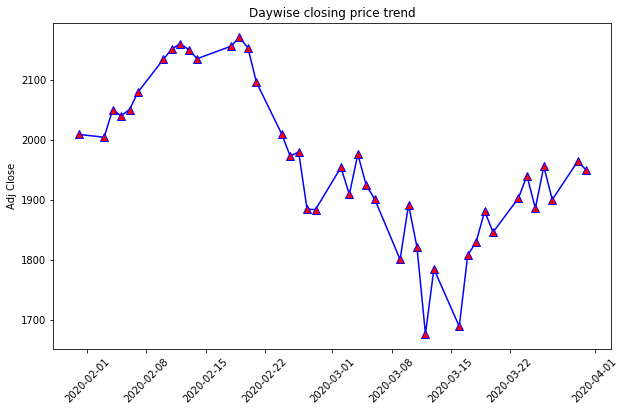

In [91]:
plt.figure(figsize=(10,6))
plt.plot(stock_data['Date'],stock_data['Adj Close'],color='b', linewidth=1.5,marker='^',markersize=8,
         linestyle='-',markerfacecolor='red')
plt.title("Daywise closing price trend")
plt.xticks(rotation=45)
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.show()

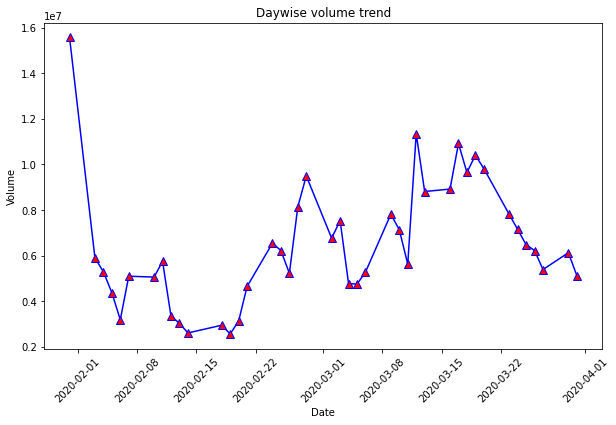

In [93]:
# Now let's plot the total volume of stock being traded each day

plt.figure(figsize=(10,6))
plt.plot(stock_data['Date'],stock_data['Volume'],color='b', linewidth=1.5,marker='^',markersize=8,
         linestyle='-',markerfacecolor='red')
plt.title("Daywise volume trend")
plt.xticks(rotation=45)
plt.ylabel('Volume')
plt.xlabel('Date')
plt.show()


## Merging  stock & traders datasets

In [94]:
'''
Merge the trader dataset and stock dataset based on the key, trading date and stock date. 
Use keys from the trader dataset only, as on same date many traders can trade. 
'''

merge_data = pd.merge(traders_data, stock_data, how='left', left_on='tradeDate', right_on='Date', 
                      left_index=True, right_index=False)

In [95]:


# Lets check quickly data after merging for any particular date
merge_data[merge_data['tradeDate'] == '2020-02-10']



,countryCode,firstName,lastName,traderId,stockSymbol,stockName,tradeId,price,volume,tradeDatetime,tradeDate,Date,High,Low,Open,Close,Volume,Adj Close
6.0,NZ,Brittany,Herring,pjjFIyeNTWRUWCuKoQSU,AMZN,Amazon,U9-4261680I,2351.144500,154.0,2020-02-10 17:42:11,2020-02-10,2020-02-10,2135.600098,2084.959961,2085.01001,2133.909912,5056200.0,2133.909912
6.0,KP,Tonya,Hernandez,wsdSKUxJgukcXlhktChZ,AMZN,Amazon,t6-6375744g,2402.000000,249.0,2020-02-10 11:14:06,2020-02-10,2020-02-10,2135.600098,2084.959961,2085.01001,2133.909912,5056200.0,2133.909912
6.0,KM,John,Nguyen,JyfwFVYySnPCaLuQIazT,AMZN,Amazon,k9-63748e,1577.273484,117.0,2020-02-10 19:35:43,2020-02-10,2020-02-10,2135.600098,2084.959961,2085.01001,2133.909912,5056200.0,2133.909912


In [98]:
# Checking datasets size
print(traders_data.shape)
print(stock_data.shape)
print(merge_data.shape)

(55, 11)
(42, 7)
(55, 18)


In [99]:
merge_data.head()

,countryCode,firstName,lastName,traderId,stockSymbol,stockName,tradeId,price,volume,tradeDatetime,tradeDate,Date,High,Low,Open,Close,Volume,Adj Close
6.0,NZ,Brittany,Herring,pjjFIyeNTWRUWCuKoQSU,AMZN,Amazon,U9-4261680I,2351.144500,154.0,2020-02-10 17:42:11,2020-02-10,2020-02-10,2135.600098,2084.959961,2085.010010,2133.909912,5056200.0,2133.909912
33.0,KZ,Vicki,Burgess,deTclcaRrihIYAUADJPN,AMZN,Amazon,C7-0894722J,1809.000000,156.0,2020-03-19 05:12:18,2020-03-19,2020-03-19,1945.000000,1832.650024,1860.000000,1880.930054,10399900.0,1880.930054
14.0,TN,Tony,Hoffman,vHakrmHtTDvuKvIcxniB,AMZN,Amazon,Z0-494338r,1901.210337,77.0,2020-02-21 14:13:00,2020-02-21,2020-02-21,2144.550049,2088.000000,2142.149902,2095.969971,4646300.0,2095.969971
34.0,BT,Allison,Davis,TzqyQTQjZGeLZuJqlLaQ,AMZN,Amazon,g2-90716Y,1779.637800,148.0,2020-03-20 20:55:57,2020-03-20,2020-03-20,1957.000000,1820.729980,1926.310059,1846.089966,9817900.0,1846.089966
NaN,MK,Scott,Thompson,sjAcfZksMRViIYdJRrnF,AMZN,Amazon,F0-4606780P,2403.190000,175.0,2020-02-29 21:32:35,2020-02-29,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
# Saving this final data for reference during deployment
marketDataLabel.to_pickle('marketDataLabel.pkl')

## Task
We want to find traders which made suspicious orders. To be a suspicious orders we consider the 
following rules:
- The trader has submitted an order above the high price/below the low price for a given day of a stock
- The trader has submitted an order in a date when the stock was not traded

If any suspicious orders are found, we want to do the following analysis:

- If more than one trader is found, rank by number of suspicious orders per trader.
- Try to find if there is a correlation between the nationality of the trader and the 
tendency to make suspicious orders 

In [60]:
def find_fraud_trader(df):
    df['suspicious'] = True
    df['suspicious'] = df.apply(lambda row:True if(pd.isnull(row['High']) | (row['price'] > row['High']) | (row['price'] < row['Low'])) else False, axis=1)
    
    return df

In [102]:
merge_data = find_fraud_trader(merge_data)

In [103]:
print("Number of trading : ",merge_data.shape[0])
print("Number of suspicious trading : ",merge_data[merge_data['suspicious']==True].shape[0])
print("Number of genuine trading : ",merge_data[merge_data['suspicious']==False].shape[0])

Number of trading :  55
Number of suspicious trading :  51
Number of genuine trading :  4


In [104]:
merge_data.columns

Index(['countryCode', 'firstName', 'lastName', 'traderId', 'stockSymbol',
       'stockName', 'tradeId', 'price', 'volume', 'tradeDatetime', 'tradeDate',
       'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'suspicious'],
      dtype='object')

In [105]:


merge_data[merge_data['traderId'] == 'pjjFIyeNTWRUWCuKoQSU']



,countryCode,firstName,lastName,traderId,stockSymbol,stockName,tradeId,price,volume,tradeDatetime,tradeDate,Date,High,Low,Open,Close,Volume,Adj Close,suspicious
6.0,NZ,Brittany,Herring,pjjFIyeNTWRUWCuKoQSU,AMZN,Amazon,U9-4261680I,2351.1445,154.0,2020-02-10 17:42:11,2020-02-10,2020-02-10,2135.600098,2084.959961,2085.01001,2133.909912,5056200.0,2133.909912,True
32.0,NZ,Brittany,Herring,pjjFIyeNTWRUWCuKoQSU,AMZN,Amazon,Y5-6456126O,2182.7000,171.0,2020-03-18 21:07:36,2020-03-18,2020-03-18,1841.660034,1745.000000,1750.00000,1830.000000,9645200.0,1830.000000,True
NaN,NZ,Brittany,Herring,pjjFIyeNTWRUWCuKoQSU,AMZN,Amazon,n8-8758476W,2209.0000,17.0,2020-02-02 17:38:52,2020-02-02,NaT,NaN,NaN,NaN,NaN,NaN,NaN,True
30.0,NZ,Brittany,Herring,pjjFIyeNTWRUWCuKoQSU,AMZN,Amazon,b1-1434938N,1792.6610,65.0,2020-03-16 07:19:46,2020-03-16,2020-03-16,1759.449951,1626.030029,1641.51001,1689.150024,8917300.0,1689.150024,True


In [106]:
# Rearrange and select necessary columns
data_label = merge_data[['tradeDate','countryCode', 'firstName', 'lastName', 'traderId', 'stockSymbol',
        'tradeId', 'price', 'volume', 'High', 'Low', 'Open', 'Close', 'Adj Close','suspicious']]

In [107]:
# Rename columns to more appropriate
data_label.rename(columns={'price': 'tradePrice','volume': 'tradeVolume',
                           'high': 'stockHighPrice','low': 'stockLowPrice',
                           'open': 'stockOpenPrice','close': 'stockClosePrice',
                           'adj close': 'stockAdjClosePrice'}, inplace=True)
data_label.shape

/home/amit/.local/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


(55, 15)

In [108]:
data_label.columns

Index(['tradeDate', 'countryCode', 'firstName', 'lastName', 'traderId',
       'stockSymbol', 'tradeId', 'tradePrice', 'tradeVolume', 'High', 'Low',
       'Open', 'Close', 'Adj Close', 'suspicious'],
      dtype='object')

In [109]:
# Saving final preprocessed data
SelectedColumns = ['tradeDate', 'countryCode', 'firstName', 'lastName', 'traderId',
       'stockSymbol', 'tradeId', 'tradePrice', 'tradeVolume', 'High', 'Low',
       'Open', 'Close', 'Adj Close', 'suspicious']

# Selecting final columns
marketDataLabel=data_label[SelectedColumns]
marketDataLabel.head(3)

,tradeDate,countryCode,firstName,lastName,traderId,stockSymbol,tradeId,tradePrice,tradeVolume,High,Low,Open,Close,Adj Close,suspicious
6.0,2020-02-10,NZ,Brittany,Herring,pjjFIyeNTWRUWCuKoQSU,AMZN,U9-4261680I,2351.144500,154.0,2135.600098,2084.959961,2085.010010,2133.909912,2133.909912,True
33.0,2020-03-19,KZ,Vicki,Burgess,deTclcaRrihIYAUADJPN,AMZN,C7-0894722J,1809.000000,156.0,1945.000000,1832.650024,1860.000000,1880.930054,1880.930054,True
14.0,2020-02-21,TN,Tony,Hoffman,vHakrmHtTDvuKvIcxniB,AMZN,Z0-494338r,1901.210337,77.0,2144.550049,2088.000000,2142.149902,2095.969971,2095.969971,True


In [110]:
print(data_label['suspicious'].value_counts())
print('\n')
print(data_label['suspicious'].value_counts(normalize=True))

True     51
False     4
Name: suspicious, dtype: int64


True     0.927273
False    0.072727
Name: suspicious, dtype: float64


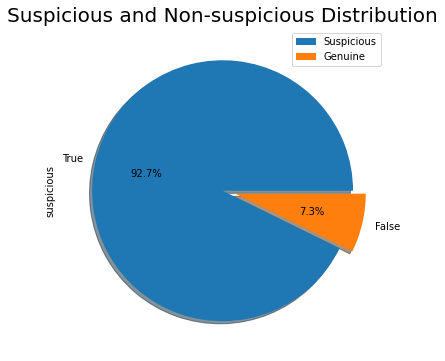

In [111]:


# Plot Pie chart for suspicious vs genue trading distribution
data_label["suspicious"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),
                                             autopct='%1.1f%%',shadow=True)
plt.title("Suspicious and Non-suspicious Distribution",fontsize=20)
plt.legend(["Suspicious", "Genuine"])
plt.show()



## Traders Suspicious analysis

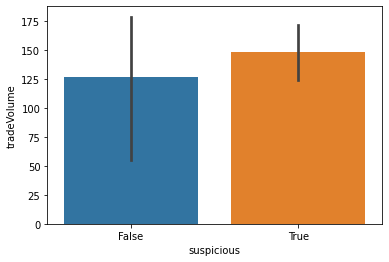

In [112]:
# Checking volume ratio of trading for suspicious and genuine
sns.barplot(x='suspicious', y='tradeVolume', data=data_label)
plt.show()

<AxesSubplot:xlabel='suspicious', ylabel='tradePrice'>

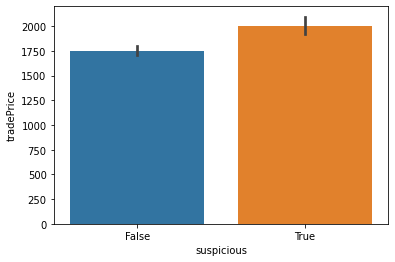

In [113]:
# Checking price ratio of trading for suspicious and genuine
sns.barplot(x='suspicious', y='tradePrice', data=data_label)

In [114]:
# Filter to only fraud data
fraud_data = data_label[data_label['suspicious']==True]
fraud_data.shape

(51, 15)

In [115]:
fraud_data['traderId'].value_counts()

sjAcfZksMRViIYdJRrnF    5
xIZVPeFzGRmMglPrQfhK    4
wsdSKUxJgukcXlhktChZ    4
BJbHFDutYbbXjgkPWbwf    4
RNvnAvOpyEVAoNGnVZQU    4
pjjFIyeNTWRUWCuKoQSU    4
JyfwFVYySnPCaLuQIazT    4
HToYfSueoxPSgBHsToac    3
MUVGtYHdeMdauAxzEJvt    3
vDAqsRnDaMrcomXsosXG    3
goRcbvzSLJhZvFucyhbG    2
deTclcaRrihIYAUADJPN    2
puCpymcjBdurvfVyRYry    2
TzqyQTQjZGeLZuJqlLaQ    2
WVcMKILUHtBkEahrPLrG    2
jDmYPxeqAWfCKCQCYFEx    2
vHakrmHtTDvuKvIcxniB    1
Name: traderId, dtype: int64

In [116]:
fraud_data.columns

Index(['tradeDate', 'countryCode', 'firstName', 'lastName', 'traderId',
       'stockSymbol', 'tradeId', 'tradePrice', 'tradeVolume', 'High', 'Low',
       'Open', 'Close', 'Adj Close', 'suspicious'],
      dtype='object')

In [117]:
# Finding frequency of each fraud trader
freq_fraud_data = fraud_data[['traderId','firstName', 'lastName','countryCode']]
freq_fraud_data.drop_duplicates(inplace=True)

<ipython-input-117-2263112094e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freq_fraud_data.drop_duplicates(inplace=True)


In [118]:
freq_fraud_data.reset_index(drop=True)

,traderId,firstName,lastName,countryCode
0,pjjFIyeNTWRUWCuKoQSU,Brittany,Herring,NZ
1,deTclcaRrihIYAUADJPN,Vicki,Burgess,KZ
2,vHakrmHtTDvuKvIcxniB,Tony,Hoffman,TN
3,TzqyQTQjZGeLZuJqlLaQ,Allison,Davis,BT
4,sjAcfZksMRViIYdJRrnF,Scott,Thompson,MK
5,wsdSKUxJgukcXlhktChZ,Tonya,Hernandez,KP
6,WVcMKILUHtBkEahrPLrG,Blake,Martin,SZ
7,JyfwFVYySnPCaLuQIazT,John,Nguyen,KM
8,BJbHFDutYbbXjgkPWbwf,Jordan,Walker,RU
9,HToYfSueoxPSgBHsToac,Erin,Grant,LC


In [119]:
# Finding frequency of each fraud trader
traderFreq = fraud_data.groupby(['traderId'])['traderId'].count()
traderFreq = pd.DataFrame({'traderId':traderFreq.index, 'traderFreq':traderFreq.values}).reset_index(drop=True)

# Merge two dataframes based on patient's ids.
freq_fraud_data = pd.merge(freq_fraud_data,traderFreq,how='inner',on='traderId')

freq_fraud_data.sort_values(by='traderFreq', ascending=False)

,traderId,firstName,lastName,countryCode,traderFreq
4,sjAcfZksMRViIYdJRrnF,Scott,Thompson,MK,5
0,pjjFIyeNTWRUWCuKoQSU,Brittany,Herring,NZ,4
7,JyfwFVYySnPCaLuQIazT,John,Nguyen,KM,4
14,RNvnAvOpyEVAoNGnVZQU,Kyle,Blair,GD,4
12,xIZVPeFzGRmMglPrQfhK,Brandon,Berry,LA,4
8,BJbHFDutYbbXjgkPWbwf,Jordan,Walker,RU,4
5,wsdSKUxJgukcXlhktChZ,Tonya,Hernandez,KP,4
9,HToYfSueoxPSgBHsToac,Erin,Grant,LC,3
10,vDAqsRnDaMrcomXsosXG,Christine,Baldwin,JP,3
16,MUVGtYHdeMdauAxzEJvt,Vanessa,Green,TV,3


In [120]:
freq_fraud_data['countryFreq'] = freq_fraud_data.groupby('countryCode')['countryCode'].transform('count')
freq_fraud_data

,traderId,firstName,lastName,countryCode,traderFreq,countryFreq
0,pjjFIyeNTWRUWCuKoQSU,Brittany,Herring,NZ,4,2
1,deTclcaRrihIYAUADJPN,Vicki,Burgess,KZ,2,1
2,vHakrmHtTDvuKvIcxniB,Tony,Hoffman,TN,1,1
3,TzqyQTQjZGeLZuJqlLaQ,Allison,Davis,BT,2,1
4,sjAcfZksMRViIYdJRrnF,Scott,Thompson,MK,5,1
5,wsdSKUxJgukcXlhktChZ,Tonya,Hernandez,KP,4,1
6,WVcMKILUHtBkEahrPLrG,Blake,Martin,SZ,2,1
7,JyfwFVYySnPCaLuQIazT,John,Nguyen,KM,4,1
8,BJbHFDutYbbXjgkPWbwf,Jordan,Walker,RU,4,1
9,HToYfSueoxPSgBHsToac,Erin,Grant,LC,3,1


In [121]:
# Trader rank by number of suspicious orders
freq_fraud_data['traderRank'] = freq_fraud_data['traderFreq'].rank(ascending=False)
freq_fraud_data.sort_values(by='traderRank')

,traderId,firstName,lastName,countryCode,traderFreq,countryFreq,traderRank
4,sjAcfZksMRViIYdJRrnF,Scott,Thompson,MK,5,1,1.0
0,pjjFIyeNTWRUWCuKoQSU,Brittany,Herring,NZ,4,2,4.5
14,RNvnAvOpyEVAoNGnVZQU,Kyle,Blair,GD,4,1,4.5
12,xIZVPeFzGRmMglPrQfhK,Brandon,Berry,LA,4,1,4.5
7,JyfwFVYySnPCaLuQIazT,John,Nguyen,KM,4,1,4.5
8,BJbHFDutYbbXjgkPWbwf,Jordan,Walker,RU,4,1,4.5
5,wsdSKUxJgukcXlhktChZ,Tonya,Hernandez,KP,4,1,4.5
9,HToYfSueoxPSgBHsToac,Erin,Grant,LC,3,1,9.0
10,vDAqsRnDaMrcomXsosXG,Christine,Baldwin,JP,3,1,9.0
16,MUVGtYHdeMdauAxzEJvt,Vanessa,Green,TV,3,1,9.0


In [122]:
freq_fraud_data[['traderFreq','countryFreq']].corr()

,traderFreq,countryFreq
traderFreq,1.0,0.0
countryFreq,0.0,1.0


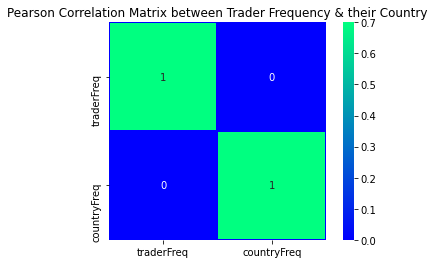

In [126]:
# Lets find correlation between the nationality of the trader and the tendency to make suspicious orders 
plt.title('Pearson Correlation Matrix between Trader Frequency & their Country')
sns.heatmap(freq_fraud_data[['traderFreq','countryFreq']].corr(),linewidths=0.25,vmax=0.7,square=True,
            cmap="winter", linecolor='b',annot=True) 
plt.show()

### There is no relation between frequency of making suspicious order of a particular trader to his country.

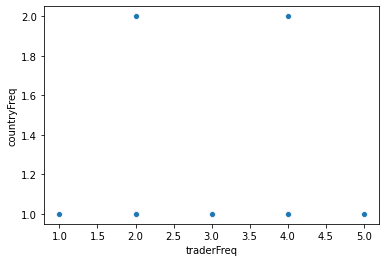

In [124]:
sns.scatterplot(x='traderFreq', y='countryFreq', data=freq_fraud_data)
plt.show()